In [1]:
#! pip install keras
#! pip install cntk
#! pip install tensorflow


In [1]:
import keras

Using TensorFlow backend.


In [2]:
%pwd

'C:\\Users\\supervisor\\巨匠楊老師的第三階段課程\\20191201-DAT236x Deep Learning Explained RNN\\AM'

In [4]:
# %timeit
# import pymssql
# import pandas as pd
# conn = pymssql.connect(server="10.30.48.148" , database = 'cmonitor' , port=1433)  
# stmt = """SELECT [SQLProcessUtilization]                 
#           FROM   [dbo].[tblWmiSessions] 
#           WHERE  ComputerName='localhost' AND 
#                  [EventTime] between '2017/1/1 00:00:00' and '2018/12/31 23:59:59' """
# # Excute Query here
# df = pd.read_sql(stmt,conn)

In [3]:
import pandas as pd
df = pd.read_csv('data2330.csv', index_col= 0)
df[-3:]

,SQLProcessUtilization
215,311.0
216,309.5
217,305.0


In [4]:
print(df.SQLProcessUtilization[-500:].to_list())

[234.0, 219.5, 215.5, 208.0, 213.0, 211.0, 215.5, 216.0, 220.5, 218.5, 221.0, 217.5, 220.5, 218.5, 221.0, 223.0, 220.5, 222.5, 226.0, 229.0, 222.5, 221.0, 228.0, 230.0, 229.0, 227.0, 227.0, 230.0, 229.0, 234.5, 236.5, 236.5, 238.0, 239.5, 239.0, 235.5, 233.0, 234.0, 234.0, 230.0, 230.5, 235.5, 237.0, 234.5, 239.0, 241.0, 240.5, 242.0, 245.5, 248.5, 241.5, 244.0, 241.5, 242.0, 245.5, 245.5, 246.0, 246.5, 253.0, 254.0, 254.0, 252.0, 252.0, 255.5, 257.0, 261.5, 264.5, 264.5, 266.0, 268.0, 269.0, 267.5, 260.0, 259.5, 259.0, 265.0, 259.0, 262.5, 260.0, 256.5, 256.0, 250.5, 248.5, 249.0, 247.0, 241.5, 238.0, 234.0, 238.0, 230.0, 233.0, 231.0, 230.5, 229.5, 231.0, 235.5, 238.0, 233.0, 235.0, 232.0, 240.0, 244.5, 246.0, 240.0, 236.0, 233.0, 235.5, 244.0, 245.0, 248.5, 241.0, 238.5, 234.5, 240.5, 239.0, 248.5, 249.0, 242.5, 244.0, 243.0, 242.5, 242.0, 247.0, 250.0, 250.5, 254.5, 256.0, 252.0, 254.0, 259.0, 264.0, 264.0, 265.0, 265.0, 261.0, 261.0, 260.0, 259.5, 256.5, 251.5, 246.5, 248.5, 248.0

In [5]:
from numpy import array

sequence = df.SQLProcessUtilization[-500:].to_list()

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

n_steps = 14
X, y = split_sequence(sequence, n_steps)
top = 10
for i in zip(X[:top], y[:top]):
    print(i)

(array([234. , 219.5, 215.5, 208. , 213. , 211. , 215.5, 216. , 220.5,
       218.5, 221. , 217.5, 220.5, 218.5]), 221.0)
(array([219.5, 215.5, 208. , 213. , 211. , 215.5, 216. , 220.5, 218.5,
       221. , 217.5, 220.5, 218.5, 221. ]), 223.0)
(array([215.5, 208. , 213. , 211. , 215.5, 216. , 220.5, 218.5, 221. ,
       217.5, 220.5, 218.5, 221. , 223. ]), 220.5)
(array([208. , 213. , 211. , 215.5, 216. , 220.5, 218.5, 221. , 217.5,
       220.5, 218.5, 221. , 223. , 220.5]), 222.5)
(array([213. , 211. , 215.5, 216. , 220.5, 218.5, 221. , 217.5, 220.5,
       218.5, 221. , 223. , 220.5, 222.5]), 226.0)
(array([211. , 215.5, 216. , 220.5, 218.5, 221. , 217.5, 220.5, 218.5,
       221. , 223. , 220.5, 222.5, 226. ]), 229.0)
(array([215.5, 216. , 220.5, 218.5, 221. , 217.5, 220.5, 218.5, 221. ,
       223. , 220.5, 222.5, 226. , 229. ]), 222.5)
(array([216. , 220.5, 218.5, 221. , 217.5, 220.5, 218.5, 221. , 223. ,
       220.5, 222.5, 226. , 229. , 222.5]), 221.0)
(array([220.5, 218.5, 22

In [6]:
from keras import Sequential
from keras.layers import LSTM, Dense, Bidirectional
n_features = 1
# define model
# SimpleRNN
# LSTM
# Bidirectional LSTM
model = Sequential()
model.add(LSTM(500, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Bidirectional(LSTM(1300, activation='relu')))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 14, 500)           1004000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 2600)              18730400  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2601      
Total params: 19,737,001
Trainable params: 19,737,001
Non-trainable params: 0
_________________________________________________________________


In [7]:
# fit# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X.shape)
# fit model
history = model.fit(X, y, epochs=200, verbose=0)

(204, 14, 1)


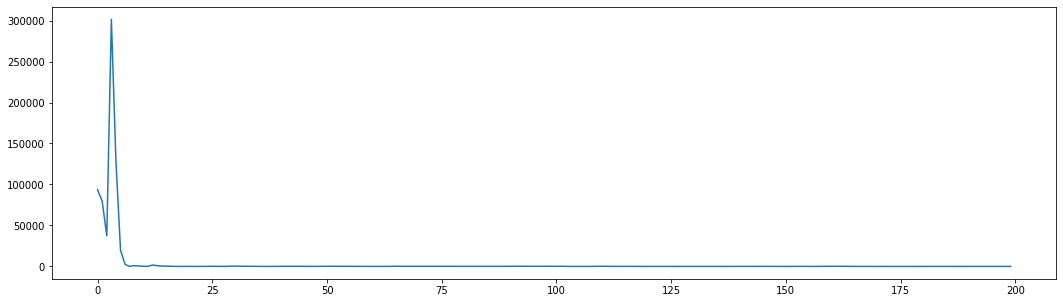

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
plt.plot(range(len(history.history['loss'])), history.history['loss']  )

history.history['loss']
plt.show()

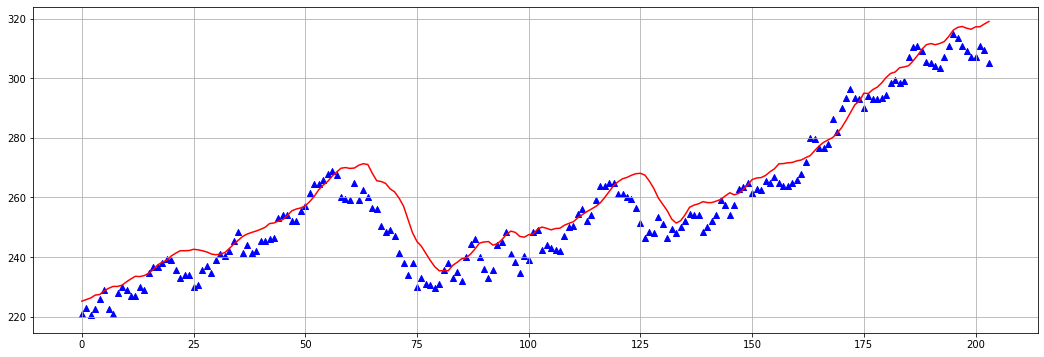

In [9]:
import matplotlib.pyplot as plt
y_pred = model.predict(X)
plt.figure(figsize=(18,6))
plt.plot(range(y_pred.shape[0]), y_pred.flatten(), color='red'   )
plt.scatter(range(len(y)), y, color='blue', marker='^'   )
plt.grid()
plt.show()

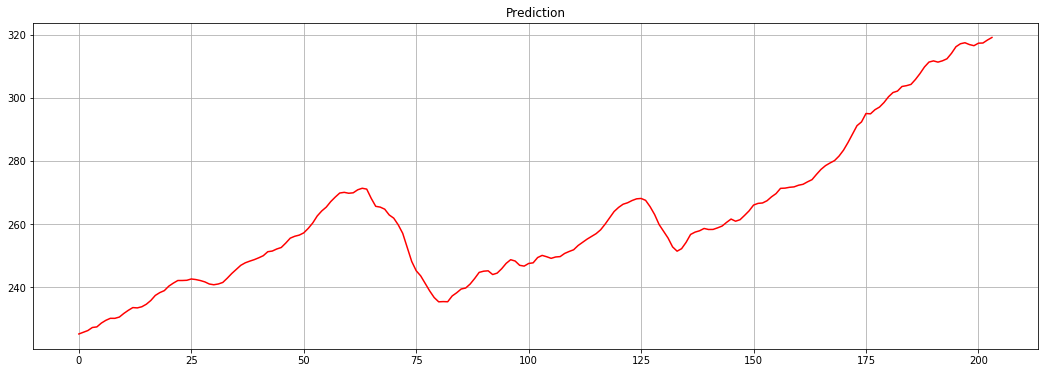

In [10]:
import matplotlib.pyplot as plt
y_pred = model.predict(X)
plt.figure(figsize=(18,6))
plt.title('Prediction')
plt.plot(range(y_pred.shape[0]), y_pred.flatten(), color='red'   )
plt.grid()
plt.show()

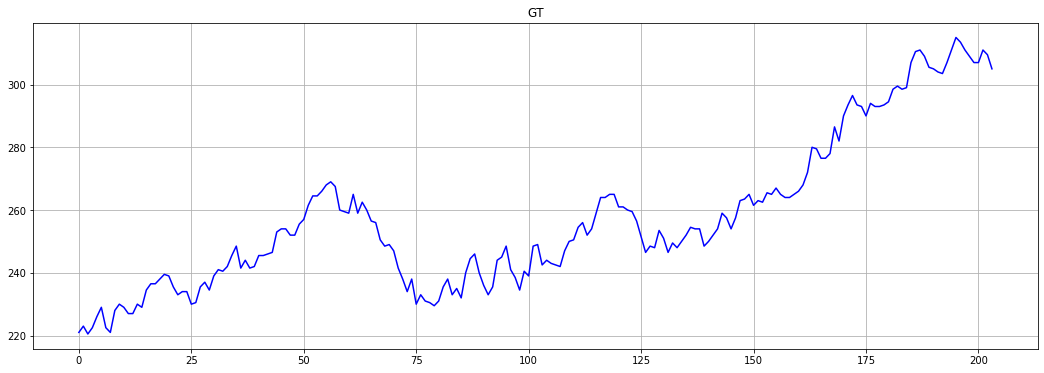

In [11]:
import matplotlib.pyplot as plt
y_pred = model.predict(X)
plt.figure(figsize=(18,6))
plt.title('GT')
plt.plot(range(len(y)), y, color='blue'   )
plt.grid()
plt.show()

In [ ]:
#array(sequence[-1 * n_steps-1:-1])

In [ ]:
#sequence[-1 * n_steps-1:]

In [ ]:
#X[-1].flatten() , y[-1]

In [12]:
#[......  012345678910111213 ,y=10]
import numpy as np
np.array([0, 1, 2, 3, 4]).reshape(-1, 5).shape

(1, 5)

In [13]:
# verify last one
import numpy as np
X_test = array(sequence[-1 * n_steps -1 :-1])
#print(X_test)
X_test = X_test.reshape(-1, n_steps)
#print(X_test) [samples, timesteps, features]
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
#print(X_test.shape)
y_test = y[-1:]
y_pred = model.predict(X_test)[0]
print(y_test[0], '-->', y_pred[0])
print('Error ',np.abs( y_pred - y_test)[0] / y_test[0]* 100, '%' ) 

305.0 --> 319.07596
Error  4.615068279328893 %


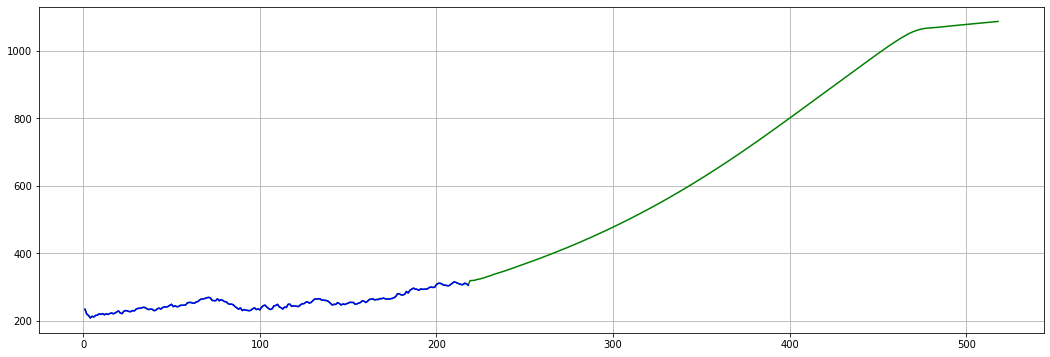

In [14]:
#predict next 300 timesplot
#[... 012345678910111213 14 15 16]
import numpy as np
import matplotlib.pyplot as plt
next_time = 300
hist = sequence[-1 * n_steps:]
X_test = array(hist).reshape(-1, n_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

pred = sequence.copy()

for i in range(next_time):
    nx = model.predict(X_test)[0][0]
    pred.append(nx)    
    data = pred[-1 * n_steps:]
    X_test = array(data).reshape(-1, n_steps).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

plt.figure(figsize=(18,6))    
plt.plot(range(1, 1+len(pred)), pred, color='green')    
plt.plot(range(1, 1+len(sequence)), sequence, color='blue') 
plt.grid()
plt.show()

In [ ]:
X_train_ml = X.reshape(X.shape[0], X.shape[1])
y_train_ml = y.copy()
X_train_ml[-1:]

In [ ]:
!pip install scikit-learn

In [ ]:
##################
# machine learning
##################
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_ml, y_train_ml)

print(reg.score(X_train_ml, y_train_ml))
print(reg.coef_)
print(reg.intercept_ )


In [ ]:
import matplotlib.pyplot as plt
y_pred_ml = reg.predict(X_train_ml)
plt.figure(figsize=(18,6))
plt.plot(range(y_pred_ml.shape[0]), y_pred_ml.flatten(), color='red'   )
plt.plot(range(len(y_train_ml)), y_train_ml, color='blue'   )
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
y_pred_ml = reg.predict(X_train_ml)
plt.figure(figsize=(18,6))
plt.title('Prediction')
plt.plot(range(y_pred_ml.shape[0]), y_pred_ml.flatten(), color='red'   )
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
y_pred_ml = reg.predict(X_train_ml)
plt.figure(figsize=(18,6))
plt.title('GT')
plt.plot(range(len(y_train_ml)), y_train_ml, color='blue'   )
plt.grid()
plt.show()

In [ ]:
# prediction with machine learning

#predict next 300 timesplot

import numpy as np
import matplotlib.pyplot as plt
next_time = 300
hist_ml = sequence[-1 * n_steps:]
X_test = array(hist_ml).reshape(-1, n_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

pred_ml = sequence.copy()

for i in range(next_time):
    nx = reg.predict(X_test)[0]
    pred_ml.append(nx)    
    data = pred_ml[-1 * n_steps:]
    X_test = array(data).reshape(-1, n_steps).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

plt.figure(figsize=(18,6))    
plt.plot(range(1, 1+len(pred_ml)), pred_ml, color='green')    
plt.plot(range(1, 1+len(sequence)), sequence, color='blue') 
plt.grid()
plt.show()
